In [1]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
pd.read_csv('C:\\Users\\BIT\\OneDrive\\Desktop\\CC GENERAL.csv')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
from sklearn.datasets import make_blobs

In [7]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [8]:
import matplotlib.pyplot as plt

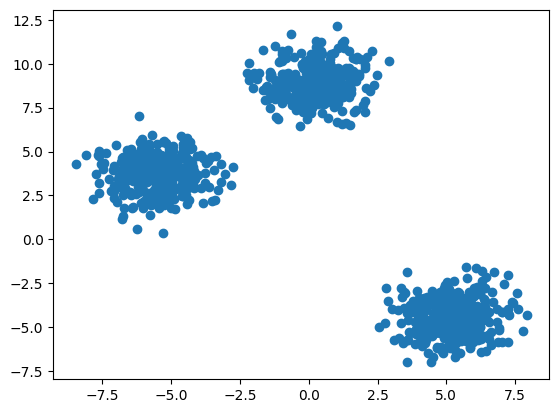

In [11]:
plt.scatter(X[:,0],X[:,1])

In [12]:
from sklearn.cluster import KMeans

In [13]:
wssc=[]
for k in range(1,12):
    km=KMeans(k,init='k-means++')
    km.fit(X)
    wssc.append(km.inertia_)

Text(0, 0.5, 'wssc score')

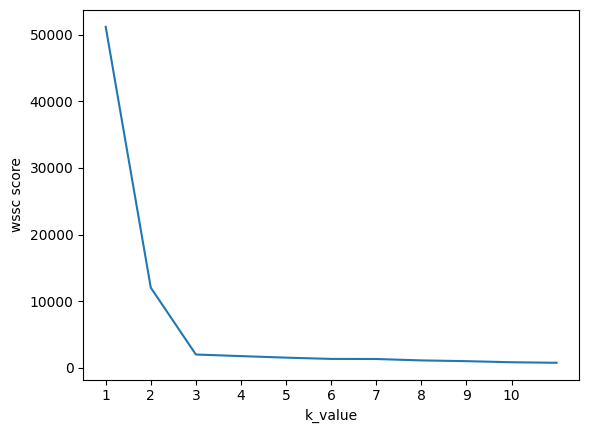

In [21]:
plt.plot(range(1,12),wssc)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel("k_value")
plt.ylabel("wssc score")

In [23]:
## so the k_value is 3 
km=KMeans(n_clusters=3,init='k-means++')

In [26]:
y_label=km.fit_predict(X)

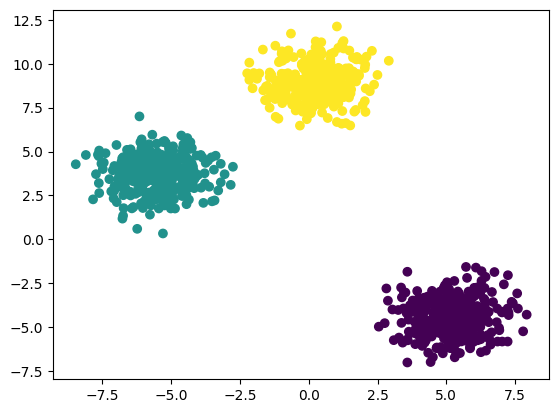

In [30]:
plt.scatter(X[:,0],X[:,1],c=y_label)

In [31]:
!pip install kneed


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
from kneed import KneeLocator

In [38]:
kl=KneeLocator(range(1,12),wssc,curve='convex',direction='decreasing')

In [39]:
kl.elbow

3

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
silhouette_coff=[]
for k in range(2,13):
    kmn=KMeans(k,init='k-means++')
    kmn.fit(X)
    score=silhouette_score(X,kmn.labels_)
    silhouette_coff.append(score)

In [42]:
silhouette_coff

[0.7243367650317767,
 0.8054287074841491,
 0.6378204489378452,
 0.4887593735118788,
 0.30963006700777784,
 0.47587844199272833,
 0.3377267518949898,
 0.31654744641959603,
 0.3391143337484843,
 0.33160769044110683,
 0.3334952169681441]

In [43]:
#it also indicate when k=3  score is 0.805...... which is greatest ever 